In [2]:
from bs4 import BeautifulSoup
import requests

keyword = '데이터 분석가'

URL = 'https://www.saramin.co.kr/zf_user/search/recruit?searchType=search&company_cd=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C9%2C10&keydownAccess=&searchword={}&panel_type=&search_optional_item=y&search_done=y&panel_count=y&preview=y&recruitPage=6&recruitSort=relation&recruitPageCount=40&inner_com_type=&show_applied=&quick_apply=&except_read=&ai_head_hunting=&mainSearch=n'.format(keyword) 
response = requests.get(URL, headers ={'User-Agent':'Mozilla/5.0'})
print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')

200


In [3]:
# 태그 테스트
job_list = []

# 사람인 

div_tags = soup.select('#recruit_info .item_recruit')

for div_tag in div_tags:   
    
    job_info = {}   
    
    #print(div_tag.select('.job_condition > span')[0].text.strip())
    #print(div_tag.select('.job_condition > span')[1].text.strip())
    #print(div_tag.select('.job_condition > span')[2].text.strip())

    job_info['회사명'] = div_tag.select_one('.area_corp .track_event').text.strip()
    job_info['채용공고'] = div_tag.select_one('.area_job .job_tit').text.strip()
    job_info['경력'] = div_tag.select('.job_condition > span')[1].text.strip()
    job_info['지원자격'] = div_tag.select('.job_condition > span')[2].text.strip()
    #job_info['고용형태'] = div_tag.select('.job_condition > span')[3].text.strip()
    job_info['지역'] = div_tag.select('.job_condition > span')[0].text.strip()
    job_info['플랫폼'] = '사람인'

    job_list.append(job_info)

job_list[0]

{'회사명': '국립암센터',
 '채용공고': '국립암센터  암빅데이터센터(데이터결합파트 ) 과제연구원 채용',
 '경력': '경력',
 '지원자격': '대졸↑',
 '지역': '경기 고양시 일산동구',
 '플랫폼': '사람인'}

In [4]:
# 페이징 처리
job_list = []

page = 1

while True:
    URL = 'https://www.saramin.co.kr/zf_user/search/recruit?searchType=search&company_cd=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C9%2C10&keydownAccess=&searchword={}&panel_type=&search_optional_item=y&search_done=y&panel_count=y&preview=y&recruitPage={}&recruitSort=relation&recruitPageCount=40&inner_com_type=&show_applied=&quick_apply=&except_read=&ai_head_hunting=&mainSearch=n'.format(keyword, page) 
    response = requests.get(URL, headers ={'User-Agent':'Mozilla/5.0'})
    #response.status_code
  
    #print(URL)

    soup = BeautifulSoup(response.text, 'html.parser')

    no_result = soup.select('.info_no_result')

    print('현재 페이지' + str(page))

    if len(no_result) > 0:

        print('페이지 끝' + str(page))

        break

    else:
        div_tags = soup.select('#recruit_info .item_recruit')

        for div_tag in div_tags:   
            
            job_info = {}   
            
            # print(div_tag.select_one('.area_job .job_tit').text.strip())

            job_info['회사명'] = div_tag.select_one('.area_corp .track_event').text.strip()
            job_info['채용공고'] = div_tag.select_one('.area_job .job_tit').text.strip()
            job_info['경력'] = div_tag.select('.job_condition > span')[1].text.strip()
            job_info['지원자격'] = div_tag.select('.job_condition > span')[2].text.strip()
            #job_info['고용형태'] = div_tag.select('.job_condition > span')[3].text.strip()
            job_info['지역'] = div_tag.select('.job_condition > span')[0].text.strip()
            job_info['플랫폼'] = '사람인'

            job_list.append(job_info)
    
    page += 1

job_list

현재 페이지1
현재 페이지2
현재 페이지3
현재 페이지4
현재 페이지5
현재 페이지6
현재 페이지7
현재 페이지8
현재 페이지9
현재 페이지10
현재 페이지11
현재 페이지12
현재 페이지13
현재 페이지14
현재 페이지15
현재 페이지16
현재 페이지17
현재 페이지18
현재 페이지19
현재 페이지20
현재 페이지21
현재 페이지22
현재 페이지23
현재 페이지24
현재 페이지25
현재 페이지26
현재 페이지27
현재 페이지28
현재 페이지29
현재 페이지30
페이지 끝30


[{'회사명': '바탕에비뉴(주)',
  '채용공고': 'JAVA 개발자/빅데이터 분석가 채용',
  '경력': '경력',
  '지원자격': '대졸↑',
  '지역': '서울 금천구',
  '플랫폼': '사람인'},
 {'회사명': '(주)데이터마케팅코리아',
  '채용공고': '데이터 분석가, 데이터 전략 컨설턴트 채용',
  '경력': '경력무관',
  '지원자격': '대졸↑',
  '지역': '서울 강남구',
  '플랫폼': '사람인'},
 {'회사명': '(주)에이아이더뉴트리진',
  '채용공고': 'AI, 머신러닝 데이터분석가 등 신입 및 경력 채용',
  '경력': '신입·경력',
  '지원자격': '대졸↑',
  '지역': '서울 강남구',
  '플랫폼': '사람인'},
 {'회사명': '(주)인터엑스',
  '채용공고': '데이터분석(이미지 및 영상 데이터 분석가, Data Scientist)',
  '경력': '신입·경력',
  '지원자격': '학력무관',
  '지역': '서울전체',
  '플랫폼': '사람인'},
 {'회사명': '인텔렉추얼데이터(주)',
  '채용공고': 'eDiscovery Project Manager(데이터 분석가) 인턴 채용',
  '경력': '경력무관',
  '지원자격': '대졸↑',
  '지역': '서울 강남구',
  '플랫폼': '사람인'},
 {'회사명': '(주)와이리',
  '채용공고': "2030 여행 플랫폼 '와이리'에서 데이터분석가를 모집합니다 :)",
  '경력': '경력무관',
  '지원자격': '학력무관',
  '지역': '서울 중구',
  '플랫폼': '사람인'},
 {'회사명': '(주)패스트뷰',
  '채용공고': '[제품개발그룹] 데이터 분석가 (Data Analyst)',
  '경력': '경력 1~4년',
  '지원자격': '학력무관',
  '지역': '서울 강남구',
  '플랫폼': '사람인'},
 {'회사명': '콘센트릭스서비스코리아(유)',
  '채용공고': '데이터 분석가 채용',


In [5]:
# 잡코리아
URL = 'https://www.jobkorea.co.kr/Search/?stext={}&tabType=recruit&Page_No=1'.format(keyword) 
response = requests.get(URL, headers ={'User-Agent':'Mozilla/5.0'})
print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')

200


In [6]:
div_tags = soup.select('.list-default .list-post')

for div_tag in div_tags:   
    
    job_info = {}   

    job_info['회사명'] = div_tag.select_one('.post-list-corp .name').text.strip() 
    job_info['채용공고'] = div_tag.select_one('.post-list-info .title').text.strip()
    job_info['경력'] = div_tag.select('.option > span')[0].text.strip()    
    job_info['지원자격'] = div_tag.select('.option > span')[1].text.strip()    
    #job_info['고용형태'] = div_tag.select('.job_condition > span')[3].text.strip()
    job_info['지역'] = div_tag.select('.option > span')[4].text.strip()
    job_info['플랫폼'] = '잡코리아'

    print(job_info)

    job_list.append(job_info)

{'회사명': '(주)마이셀럽스', '채용공고': '[마이셀럽스] 데이터 분석가 정규직 채용', '경력': '경력2년↑', '지원자격': '대졸↑', '지역': '서울 강남구', '플랫폼': '잡코리아'}
{'회사명': '㈜네오플', '채용공고': '[네오플] 게임 서비스 운영 데이터 분석가 모집', '경력': '경력무관', '지원자격': '학력무관', '지역': '제주 제주시', '플랫폼': '잡코리아'}
{'회사명': '펜타시스템테크놀러지㈜', '채용공고': 'Blue Analytics 데이터 분석가 채용 공고', '경력': '경력무관', '지원자격': '대졸↑', '지역': '서울 영등포구', '플랫폼': '잡코리아'}
{'회사명': 'Spoqa', '채용공고': '(주)스포카 데이터 분석가 채용 (팀장)', '경력': '경력7년↑', '지원자격': '학력무관', '지역': '서울 강남구', '플랫폼': '잡코리아'}
{'회사명': '㈜쿡앱스', '채용공고': '[쿡앱스] 게임 데이터 분석가 모집', '경력': '경력3년↑', '지원자격': '학력무관', '지역': '경기 성남시', '플랫폼': '잡코리아'}
{'회사명': '㈜엔데이터', '채용공고': '데이터분석가(컨설턴트) 신입/경력 모집', '경력': '신입·경력', '지원자격': '대졸↑', '지역': '서울 강남구 외', '플랫폼': '잡코리아'}
{'회사명': '㈜켄즈', '채용공고': '[신입/경력] (AI/ML활용) 데이터 분석가 모집', '경력': '신입·경력2년↑', '지원자격': '대졸↑', '지역': '경기 의왕시 외', '플랫폼': '잡코리아'}
{'회사명': '㈜브릭', '채용공고': '데이터 분석가(경력 5년 이상) 채용', '경력': '경력5년↑', '지원자격': '대졸↑', '지역': '경기 성남시', '플랫폼': '잡코리아'}
{'회사명': '㈜아이뱅크 [디지털웍스]', '채용공고': '디지털 고객 행동 데이터 분석가 채용 - 신입,경력 정규직', '경력': '경력무관',

In [7]:
# 페이징 처리
page = 1

while True:
    URL = 'https://www.jobkorea.co.kr/Search/?stext={}&tabType=recruit&Page_No={}'.format(keyword, page) 
    response = requests.get(URL, headers ={'User-Agent':'Mozilla/5.0'})
    #print(response.status_code)
  
    #print(URL)

    soup = BeautifulSoup(response.text, 'html.parser')

    no_result = soup.select('.list-default .list-post')

    print('현재 페이지' + str(page))

    if len(no_result) < 1:

        print('페이지 끝' + str(page))

        break

    else:
        div_tags = soup.select('.list-default .list-post')

        for div_tag in div_tags:   
            
            job_info = {}   

            job_info['회사명'] = div_tag.select_one('.post-list-corp .name').text.strip() 
            job_info['채용공고'] = div_tag.select_one('.post-list-info .title').text.strip()
            job_info['경력'] = div_tag.select('.option > span')[0].text.strip()    
            job_info['지원자격'] = div_tag.select('.option > span')[1].text.strip()    
            #job_info['고용형태'] = div_tag.select('.job_condition > span')[3].text.strip()
            job_info['지역'] = div_tag.select_one('.option .long').text.strip()
            job_info['플랫폼'] = '잡코리아'

            print(job_info)

            job_list.append(job_info)
    
    page += 1

현재 페이지1
{'회사명': '(주)마이셀럽스', '채용공고': '[마이셀럽스] 데이터 분석가 정규직 채용', '경력': '경력2년↑', '지원자격': '대졸↑', '지역': '서울 강남구', '플랫폼': '잡코리아'}
{'회사명': '㈜네오플', '채용공고': '[네오플] 게임 서비스 운영 데이터 분석가 모집', '경력': '경력무관', '지원자격': '학력무관', '지역': '제주 제주시', '플랫폼': '잡코리아'}
{'회사명': '펜타시스템테크놀러지㈜', '채용공고': 'Blue Analytics 데이터 분석가 채용 공고', '경력': '경력무관', '지원자격': '대졸↑', '지역': '서울 영등포구', '플랫폼': '잡코리아'}
{'회사명': 'Spoqa', '채용공고': '(주)스포카 데이터 분석가 채용 (팀장)', '경력': '경력7년↑', '지원자격': '학력무관', '지역': '서울 강남구', '플랫폼': '잡코리아'}
{'회사명': '㈜쿡앱스', '채용공고': '[쿡앱스] 게임 데이터 분석가 모집', '경력': '경력3년↑', '지원자격': '학력무관', '지역': '경기 성남시', '플랫폼': '잡코리아'}
{'회사명': '㈜엔데이터', '채용공고': '데이터분석가(컨설턴트) 신입/경력 모집', '경력': '신입·경력', '지원자격': '대졸↑', '지역': '서울 강남구 외', '플랫폼': '잡코리아'}
{'회사명': '㈜켄즈', '채용공고': '[신입/경력] (AI/ML활용) 데이터 분석가 모집', '경력': '신입·경력2년↑', '지원자격': '대졸↑', '지역': '경기 의왕시 외', '플랫폼': '잡코리아'}
{'회사명': '㈜브릭', '채용공고': '데이터 분석가(경력 5년 이상) 채용', '경력': '경력5년↑', '지원자격': '대졸↑', '지역': '경기 성남시', '플랫폼': '잡코리아'}
{'회사명': '㈜아이뱅크 [디지털웍스]', '채용공고': '디지털 고객 행동 데이터 분석가 채용 - 신입,경력 정규직', '경력':

In [8]:
# 원티드
URL = 'https://www.wanted.co.kr/search?query={}'.format(keyword) 
response = requests.get(URL, headers ={'User-Agent':'Mozilla/5.0'})
print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')

200


In [9]:

from selenium import webdriver
from bs4 import BeautifulSoup
import time

URL = 'https://www.wanted.co.kr/search?query={}'.format(keyword) 
# Chrome 브라우저를 자동으로 실행
driver = webdriver.Chrome("chromedriver.exe")

# 해당 URL에 접속
driver.get(URL)

# 브라우저에서 페이지가 로드되는 동안 대기
time.sleep(5)

SCROLL_PAUSE_SEC = 1

# 스크롤 높이 가져옴
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # 끝까지 스크롤 다운
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # 1초 대기
    time.sleep(SCROLL_PAUSE_SEC)

    # 스크롤 다운 후 스크롤 높이 다시 가져옴
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# BeautifulSoup을 사용하여 HTML 코드 파싱
soup = BeautifulSoup(driver.page_source, "html.parser")

# 채용 공고 정보 추출
div_tags = soup.select('.List_List_container__JnQMS .Card_className__u5rsb')

for div_tag in div_tags:  
    
    job_info['회사명'] = div_tag.select('.body > div')[1].text.strip()
    job_info['채용공고'] = div_tag.select('.body > div')[0].text.strip()
    job_info['경력'] = ""    
    job_info['지원자격'] = "" 
    #job_info['고용형태'] = div_tag.select('.job_condition > span')[3].text.strip()
    job_info['지역'] = div_tag.select_one('.body .job-card-company-location').text.strip().split('.')[0]
    job_info['플랫폼'] = '원티드'

    print(job_info)

    job_list.append(job_info)

# 브라우저 종료
driver.quit()


{'회사명': '단색', '채용공고': '데이터 분석가(3년차)', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '게임듀오', '채용공고': '데이터 분석가', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '111퍼센트', '채용공고': '데이터 분석가', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '아우름플래닛(LINER)', '채용공고': '[100억↑투자] 프로덕트 데이터 분석가', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '큐피스트(글램)', '채용공고': '데이터 분석가 (Data Analyst)', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '더블유클럽', '채용공고': '데이터 분석가 (Data Analyst) - 3년 이상', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '젠테', '채용공고': 'Business Analyst (비즈니스 데이터 분석가)', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '카카오스타일(Kakao Style)', '채용공고': '지그재그 데이터 분석가', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '스포카', '채용공고': '데이터 분석가(팀장급)', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '모요', '채용공고': 'Data Analyst / 데이터 분석가', '경력': '', '지원자격': '', '지역': '서울', '플랫폼': '원티드'}
{'회사명': '에이블리코퍼레이션', '채용공고': '데이터 분석가 (

In [10]:
len(job_list)

1332

In [11]:
job_list[1300]

{'회사명': '티파니코리아',
 '채용공고': '데이터 분석가(Data Analytics Manager)',
 '경력': '',
 '지원자격': '',
 '지역': '서울',
 '플랫폼': '원티드'}

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline


In [13]:
# 리스트를 DataFrame으로 변환
df = pd.DataFrame(job_list, columns=['회사명', '채용공고','경력','지원자격','지역','플랫폼'])

print(df)

               회사명                                       채용공고     경력  지원자격  \
0         바탕에비뉴(주)                       JAVA 개발자/빅데이터 분석가 채용     경력   대졸↑   
1     (주)데이터마케팅코리아                    데이터 분석가, 데이터 전략 컨설턴트 채용   경력무관   대졸↑   
2     (주)에이아이더뉴트리진               AI, 머신러닝 데이터분석가 등 신입 및 경력 채용  신입·경력   대졸↑   
3          (주)인터엑스    데이터분석(이미지 및 영상 데이터 분석가, Data Scientist)  신입·경력  학력무관   
4      인텔렉추얼데이터(주)  eDiscovery Project Manager(데이터 분석가) 인턴 채용   경력무관   대졸↑   
...            ...                                        ...    ...   ...   
1327        티파니코리아            데이터 분석가(Data Analytics Manager)                
1328        티파니코리아            데이터 분석가(Data Analytics Manager)                
1329        티파니코리아            데이터 분석가(Data Analytics Manager)                
1330        티파니코리아            데이터 분석가(Data Analytics Manager)                
1331        티파니코리아            데이터 분석가(Data Analytics Manager)                

          지역  플랫폼  
0     서울 금천구  사람인  
1     서울 강남구  사람인  
2  

<Axes: xlabel='플랫폼'>

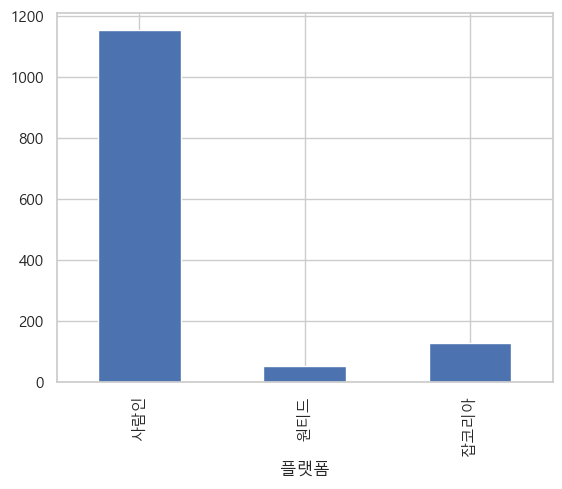

In [14]:
%matplotlib inline
df.groupby('플랫폼')['채용공고'].count().plot(kind='bar')


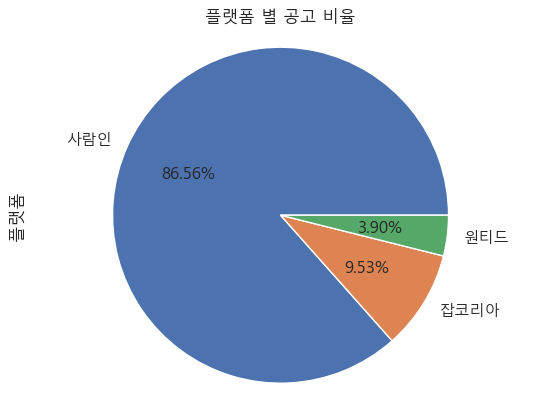

In [20]:
df3 = df.플랫폼.value_counts()
df3.plot.pie(autopct='%.2f%%')
plt.title("플랫폼 별 공고 비율")
plt.axis('equal')
plt.show()

In [21]:
%matplotlib inline
df.groupby('지역').count()


,회사명,채용공고,경력,지원자격,플랫폼
지역,,,,,
강원 원주시,1,1,1,1,1
강원 춘천시,1,1,1,1,1
경기 고양시,2,2,2,2,2
경기 고양시 덕양구,4,4,4,4,4
경기 고양시 일산동구,7,7,7,7,7
...,...,...,...,...,...
충북 청주시 상당구,3,3,3,3,3
충북 청주시 서원구,2,2,2,2,2
충북 청주시 청원구,1,1,1,1,1


In [26]:
contains_seoul = df['지역'].str.contains('서울')

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
subset_df = df[contains_seoul]

subset_df

,회사명,채용공고,경력,지원자격,지역,플랫폼
0,바탕에비뉴(주),JAVA 개발자/빅데이터 분석가 채용,경력,대졸↑,서울 금천구,사람인
1,(주)데이터마케팅코리아,"데이터 분석가, 데이터 전략 컨설턴트 채용",경력무관,대졸↑,서울 강남구,사람인
2,(주)에이아이더뉴트리진,"AI, 머신러닝 데이터분석가 등 신입 및 경력 채용",신입·경력,대졸↑,서울 강남구,사람인
3,(주)인터엑스,"데이터분석(이미지 및 영상 데이터 분석가, Data Scientist)",신입·경력,학력무관,서울전체,사람인
4,인텔렉추얼데이터(주),eDiscovery Project Manager(데이터 분석가) 인턴 채용,경력무관,대졸↑,서울 강남구,사람인
...,...,...,...,...,...,...
1327,티파니코리아,데이터 분석가(Data Analytics Manager),,,서울,원티드
1328,티파니코리아,데이터 분석가(Data Analytics Manager),,,서울,원티드
1329,티파니코리아,데이터 분석가(Data Analytics Manager),,,서울,원티드
1330,티파니코리아,데이터 분석가(Data Analytics Manager),,,서울,원티드


In [27]:
subset_df.groupby('지역').count()

,회사명,채용공고,경력,지원자격,플랫폼
지역,,,,,
서울,52,52,52,52,52
서울 강남구,285,285,285,285,285
서울 강남구 외,5,5,5,5,5
서울 강서구,19,19,19,19,19
서울 관악구,2,2,2,2,2
서울 관악구 외,2,2,2,2,2
서울 광진구,1,1,1,1,1
서울 구로구,14,14,14,14,14
서울 구로구 외,1,1,1,1,1
